**Advanced Decision Tree Classifier Analysis with Feature Entropy**

> done



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix,
    log_loss
)
from sklearn.preprocessing import LabelEncoder
import kagglehub


In [ ]:
# Download latest version
path = kagglehub.dataset_download("pranavuikey/zomato-eda")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/pranavuikey/zomato-eda/versions/1


In [ ]:
# Load the dataset
# Replace 'restaurant_dataset.csv' with the appropriate file path
df=pd.read_csv(f"{path}/zomato.csv")

In [ ]:
# Display the first few rows of the dataset
print("Dataset Preview:")
print(df.head())

Dataset Preview:
                                                 url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table   rate  votes                             phone  \
0          Yes        Yes  4.1/5    775    080 42297555\r\n+91 9743772233   
1          Yes   

In [ ]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64


In [ ]:
# Fill missing values
df['online_order'] = df['online_order'].fillna(False)
df['book_table'] = df['book_table'].fillna(False)
df['rate'] = df['rate'].fillna("0/5")
df['votes'] = df['votes'].fillna(0)
df['phone'] = df['phone'].fillna("Not Available")
df['location'] = df['location'].fillna("Unknown")
df['rest_type'] = df['rest_type'].fillna("Unknown")


In [ ]:
# Convert 'rate' to numerical, handling non-numeric values
df['rate'] = pd.to_numeric(df['rate'].str.replace("/5", "").str.replace("NEW", "0").str.replace("-", "0"), errors='coerce')


In [ ]:
# Filter valid ratings
df = df[(df['rate'] >= 0) & (df['rate'] <= 5)]

In [ ]:
# Encode categorical columns
encoder = LabelEncoder()
df['location'] = encoder.fit_transform(df['location'])
df['rest_type'] = encoder.fit_transform(df['rest_type'])

In [ ]:
# Feature Engineering
df['high_rating'] = (df['rate'] > 4).astype(int)  # Binary classification: 1 = High rating, 0 = Low rating

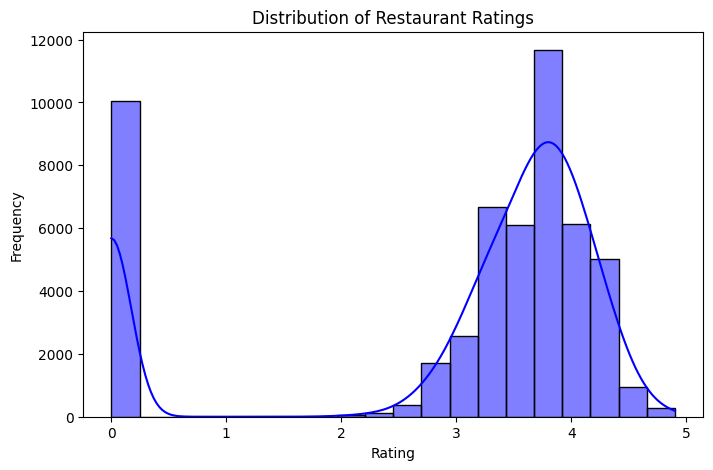

In [ ]:
# Visualize the distribution of ratings
plt.figure(figsize=(8, 5))
sns.histplot(df['rate'], bins=20, kde=True, color='blue')
plt.title("Distribution of Restaurant Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# Split data into features and target variable
X = df[['votes', 'location', 'rest_type', 'online_order', 'book_table']]
y = df['high_rating']


In [ ]:
# One-hot encode 'online_order' and 'book_table'
X = pd.get_dummies(X, columns=['online_order', 'book_table'], drop_first=True)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train a Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Predict and Evaluate
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

In [ ]:
# Metrics Calculation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
loss = log_loss(y_test, y_pred_prob)

print("\nMetrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"Log Loss: {loss:.2f}")


Metrics:
Accuracy: 0.98
Precision: 0.95
Recall: 0.95
F1-Score: 0.95
Log Loss: 0.56


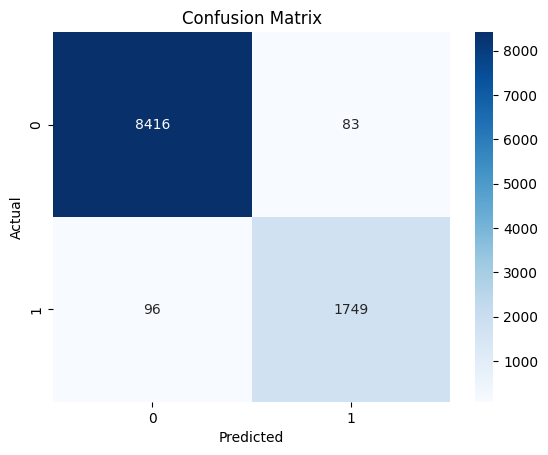

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

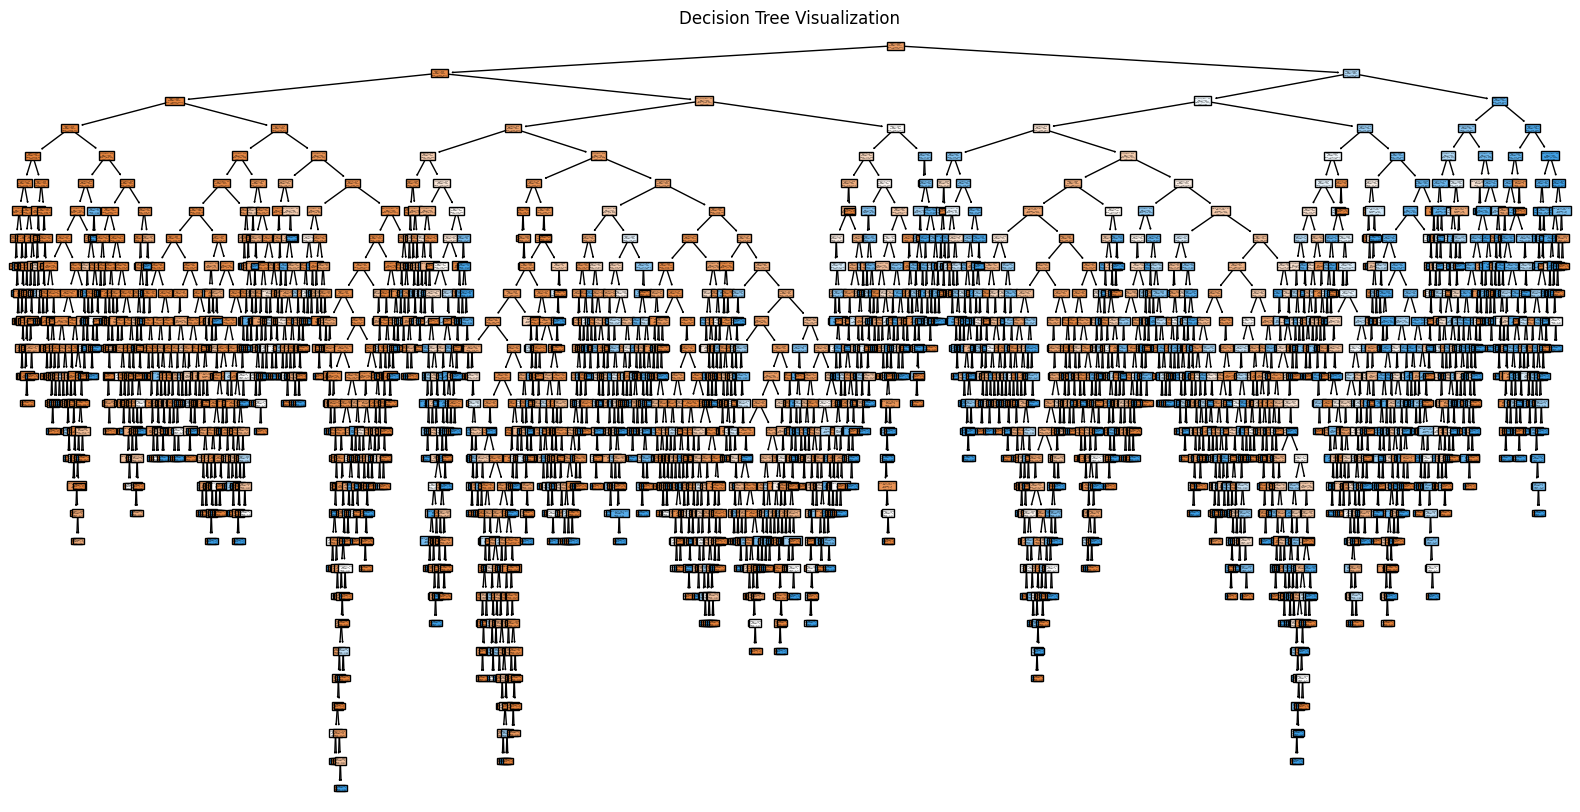

In [ ]:
# Visualize the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=X.columns, class_names=['Low', 'High'], filled=True)
plt.title("Decision Tree Visualization")
plt.show()


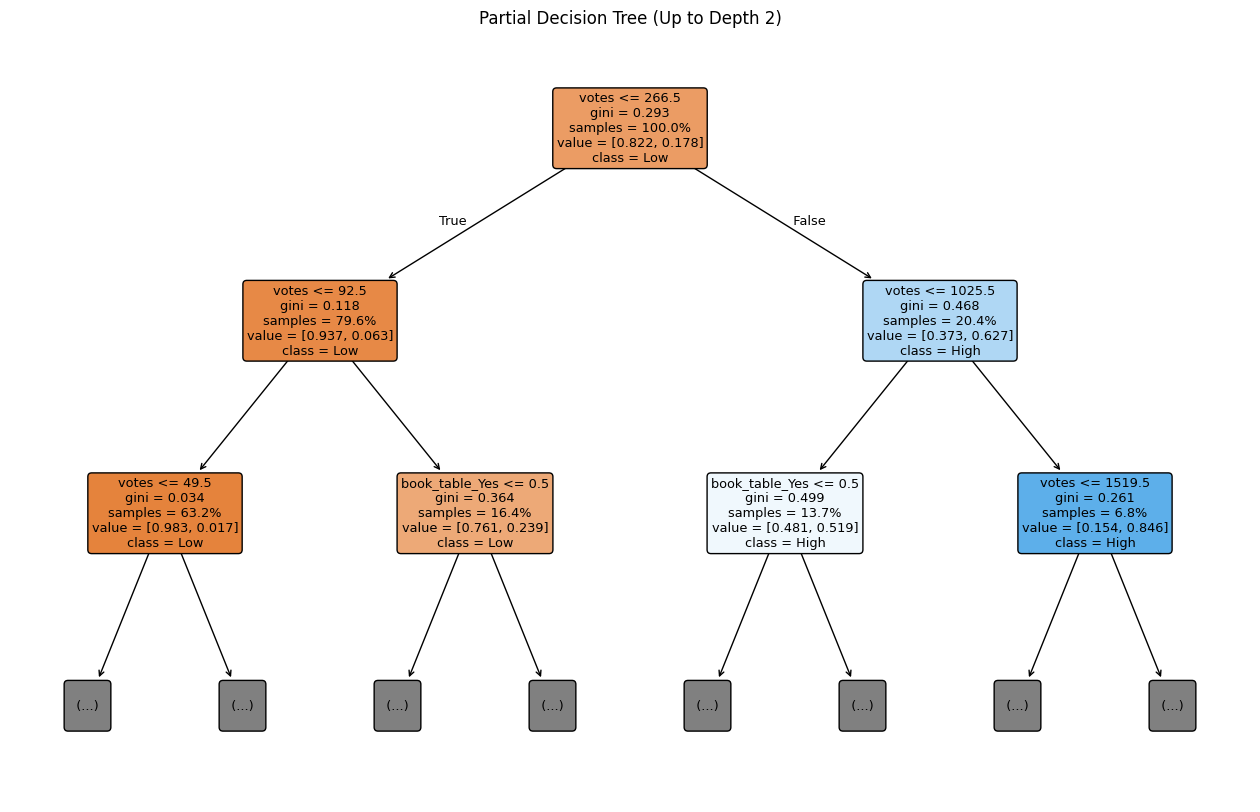

In [ ]:
# Visualizing a part of the decision tree
partial_tree_depth = 2  # Set the depth for partial visualization
plt.figure(figsize=(16, 10))
plot_tree(
    model,
    feature_names=X.columns,
    class_names=['Low', 'High'],
    filled=True,
    proportion=True,
    rounded=True,
    max_depth=partial_tree_depth  # Limit the depth of the visualization
)
plt.title(f"Partial Decision Tree (Up to Depth {partial_tree_depth})")
plt.show()


In [ ]:
# K-Fold Cross-Validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
cv_accuracy = cross_val_score(model, X, y, cv=kfold, scoring='accuracy').mean()
cv_precision = cross_val_score(model, X, y, cv=kfold, scoring='precision').mean()
cv_recall = cross_val_score(model, X, y, cv=kfold, scoring='recall').mean()
cv_f1 = cross_val_score(model, X, y, cv=kfold, scoring='f1').mean()

print("\nK-Fold Cross-Validation Metrics:")
print(f"Accuracy: {cv_accuracy:.2f}")
print(f"Precision: {cv_precision:.2f}")
print(f"Recall: {cv_recall:.2f}")
print(f"F1-Score: {cv_f1:.2f}")



K-Fold Cross-Validation Metrics:
Accuracy: 0.98
Precision: 0.96
Recall: 0.95
F1-Score: 0.95


In [ ]:
# Entropy Calculation
def calculate_entropy(series):
    counts = series.value_counts()
    probabilities = counts / len(series)
    entropy = -np.sum(probabilities * np.log2(probabilities))
    return entropy

root_entropy = calculate_entropy(y)
print(f"\nRoot Node Entropy: {root_entropy:.2f}")

for col in X.columns:
    col_entropy = calculate_entropy(X[col])
    print(f"Entropy of {col}: {col_entropy:.2f}")



Root Node Entropy: 0.68
Entropy of votes: 7.86
Entropy of location: 5.51
Entropy of rest_type: 3.51
Entropy of online_order_Yes: 0.98
Entropy of book_table_Yes: 0.54



Root Node Feature: votes
Importance: 0.6518


<ipython-input-25-4b002652197a>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


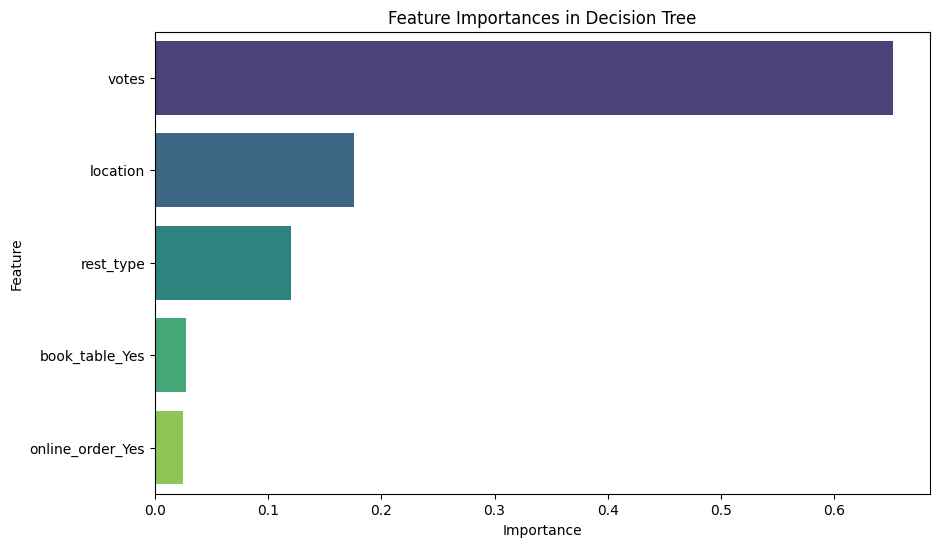

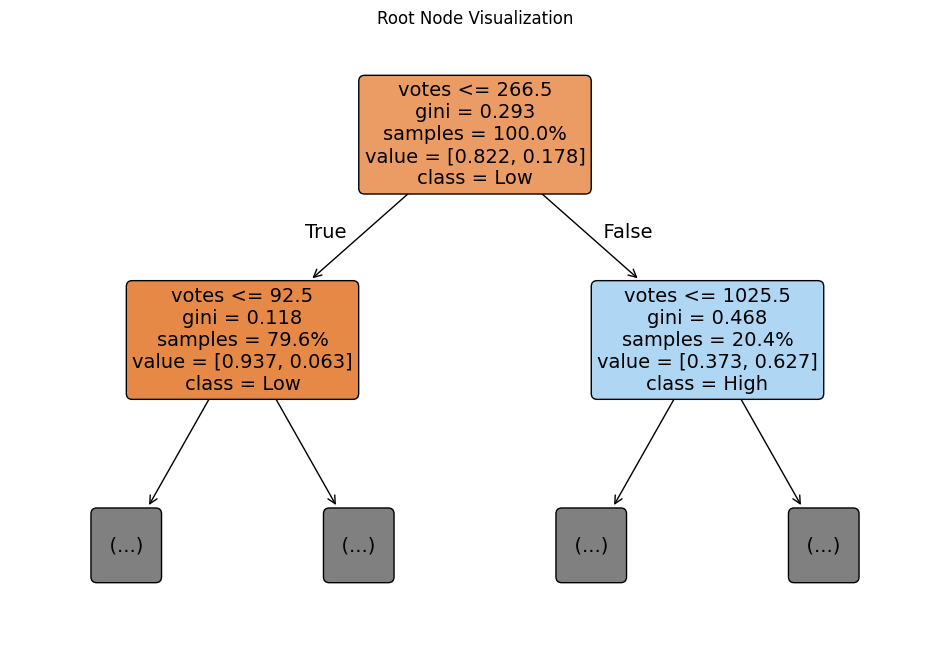

In [ ]:
# Finding the root node based on feature importances
feature_importances = model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Get the root node (highest importance)
root_node = feature_importance_df.iloc[0]
print(f"\nRoot Node Feature: {root_node['Feature']}")
print(f"Importance: {root_node['Importance']:.4f}")

# Visualizing Feature Importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title("Feature Importances in Decision Tree")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

# Visualizing the root node
plt.figure(figsize=(12, 8))
plot_tree(
    model,
    feature_names=X.columns,
    class_names=['Low', 'High'],
    filled=True,
    proportion=True,
    rounded=True,
    max_depth=1  # Visualize only the root node
)
plt.title("Root Node Visualization")
plt.show()
